In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from  sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

import seaborn as sns


In [3]:
#loading data set
df= pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#looking data type of diferrent columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#checking null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

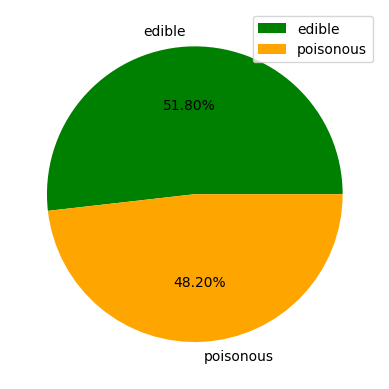

In [6]:
#seeing how balance our data set is
class_df=df['class'].value_counts().reset_index()
class_df

plt.pie(class_df['count'], labels=['edible','poisonous'], autopct='%1.2f%%', colors=['green','orange'])
plt.legend()

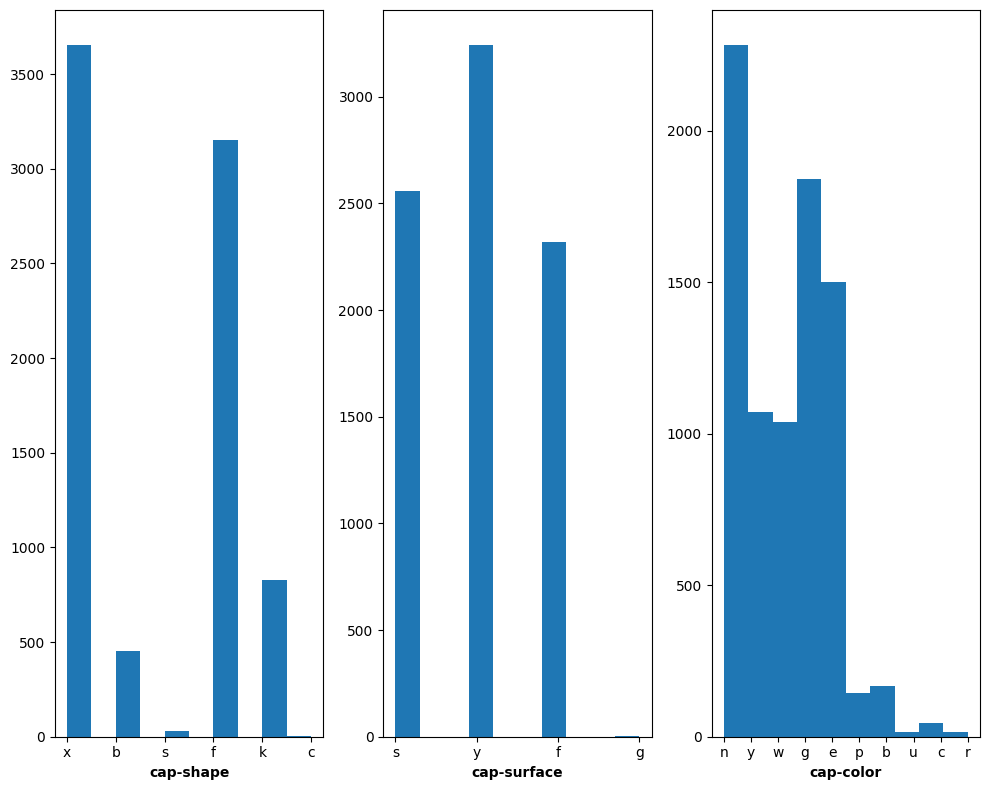

In [7]:
#looking data distribution of 'cap-shape', 'cap-surface','cap-color' columns.
fig, ax=plt.subplots(1,3, figsize=(10,8))
cap=['cap-shape', 'cap-surface','cap-color']
for i in range(len(cap)):
    ax[i].hist(df[cap[i]])
    ax[i].set_xlabel(cap[i], fontweight='bold')
plt.tight_layout()


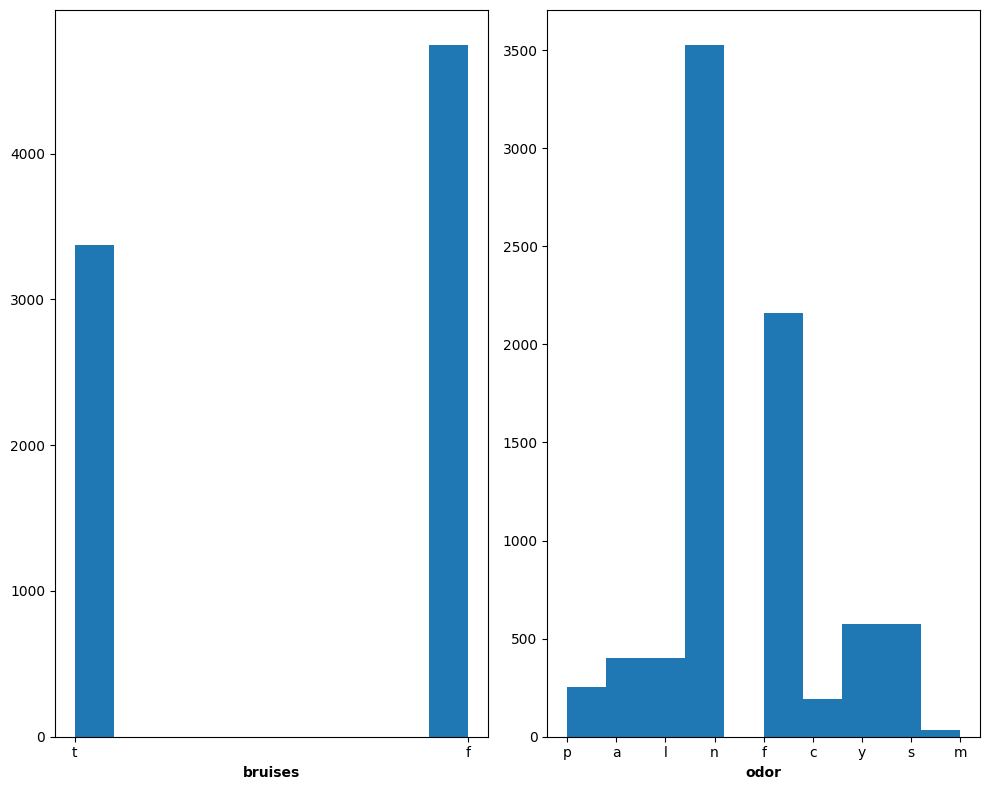

In [8]:
#looking data distribution of 'bruises','odor' columns
fig, ax=plt.subplots(1,2, figsize=(10,8))
body=['bruises','odor']
for i in range(len(body)):
    ax[i].hist(df[body[i]])
    ax[i].set_xlabel(body[i], fontweight='bold')
plt.tight_layout()



Text(0.5, 1.0, 'Mushroom count by odor')

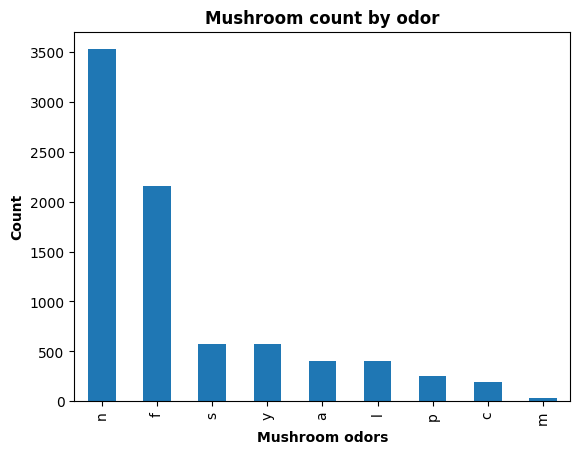

In [9]:
#making nice data distribution chart for presentation
df['odor'].value_counts().plot(kind='bar')
plt.xlabel('Mushroom odors', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Mushroom count by odor', fontweight='bold')

Text(0.5, 1.0, 'Mushroom count by cap colours')

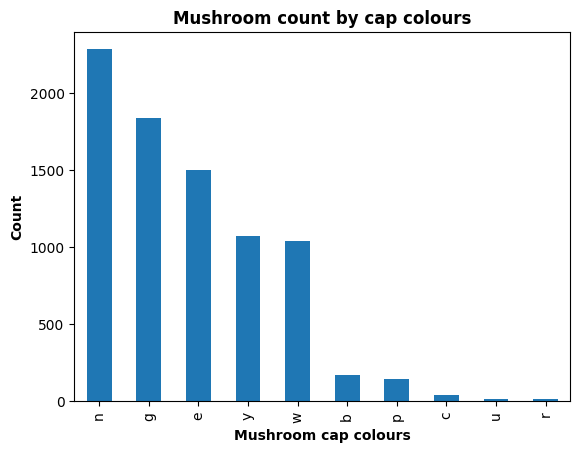

In [10]:
#making data distribution plot of 'cap-color' column
df['cap-color'].value_counts().plot(kind='bar')
plt.xlabel('Mushroom cap colours', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Mushroom count by cap colours', fontweight='bold')

Text(0.5, 1.0, 'Mushroom count by gill attachment')

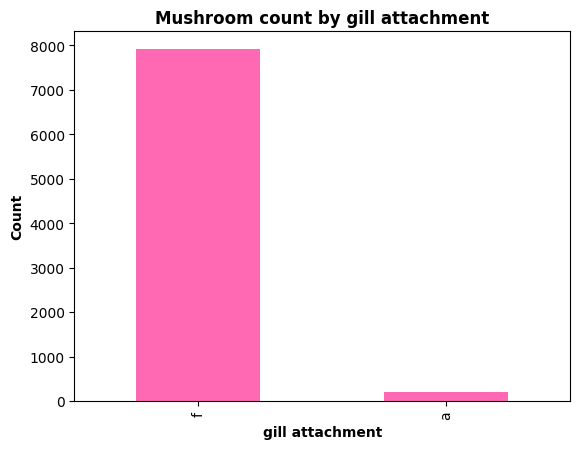

In [11]:
#making data distribution graph for 'gill attachment' column
df['gill-attachment'].value_counts().plot(kind='bar', color='hotpink')
plt.xlabel('gill attachment', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Mushroom count by gill attachment', fontweight='bold')

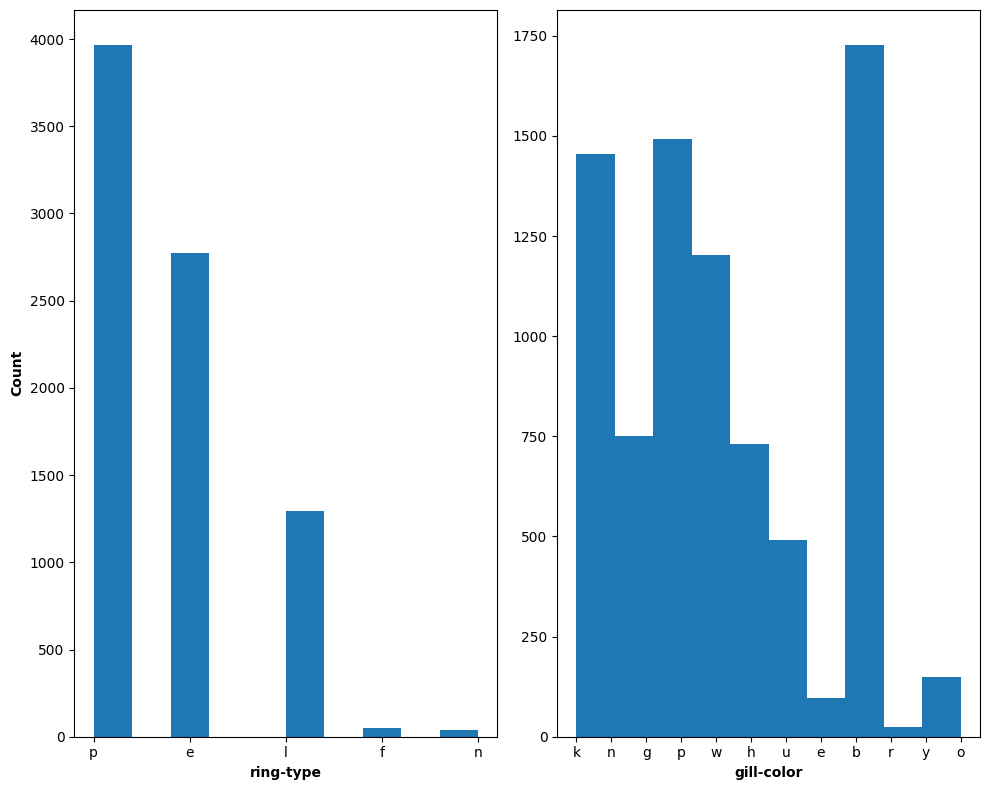

In [12]:
#making data distribution graph for 'ring-type', 'gill-color' columns
fig, ax=plt.subplots(1,2, figsize=(10,8))
body=['ring-type', 'gill-color']
for i in range(len(body)):
    ax[i].hist(df[body[i]])
    ax[i].set_xlabel(body[i], fontweight='bold')
    if i==0:
         ax[i].set_ylabel('Count', fontweight='bold')
    plt.tight_layout()


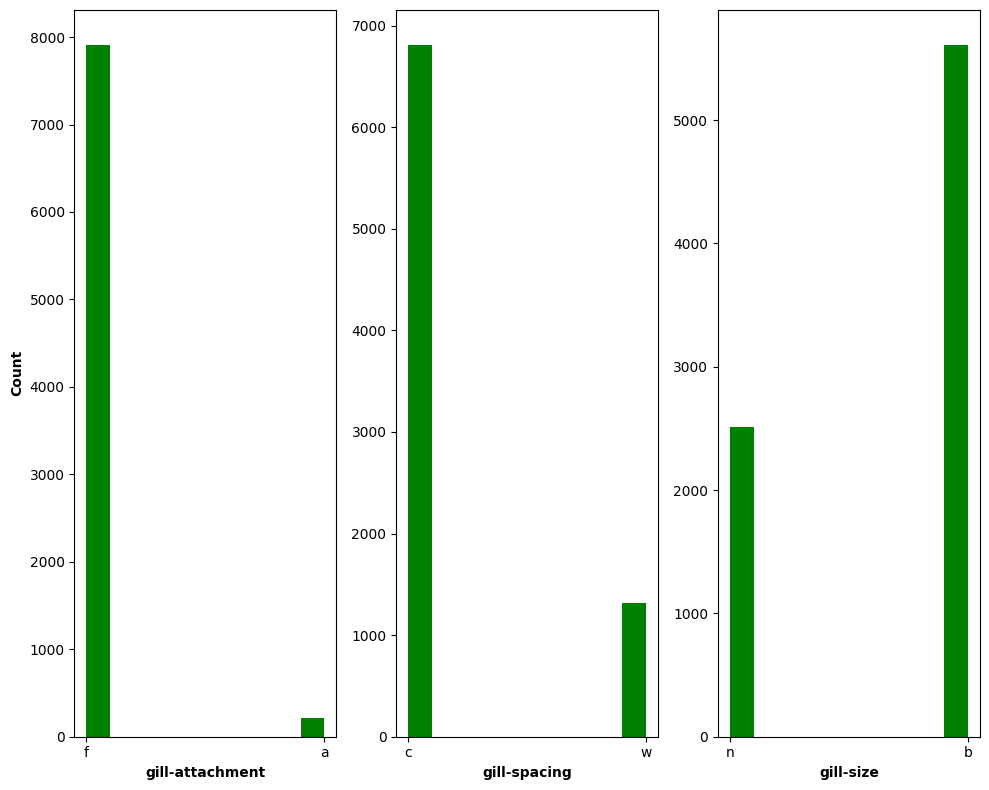

In [13]:
#making data distribution graph for 'gill-attachment', 'gill-spacing','gill-size' columns
fig, ax=plt.subplots(1,3, figsize=(10,8))
body=['gill-attachment', 'gill-spacing','gill-size']
for i in range(len(body)):
    ax[i].hist(df[body[i]], color='green')
    ax[i].set_xlabel(body[i], fontweight='bold')
    if i==0:
         ax[i].set_ylabel('Count', fontweight='bold')

plt.tight_layout()


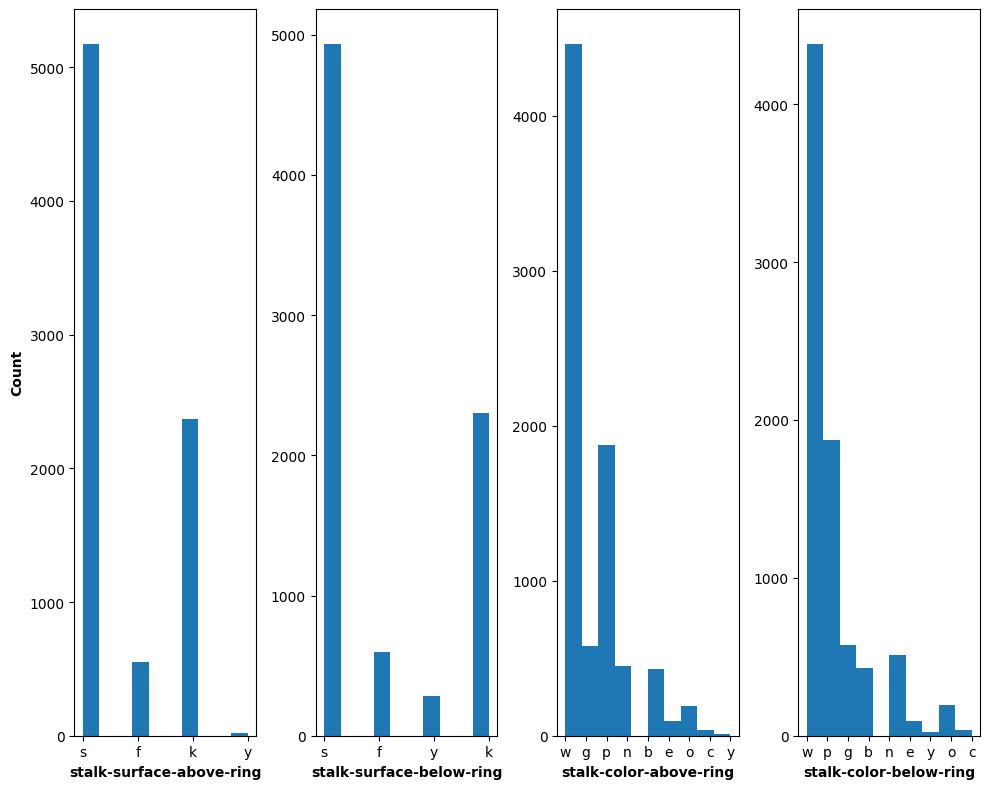

In [14]:
# making data distribution graph for 'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring' columns
fig, ax=plt.subplots(1,4, figsize=(10,8))
body=['stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring']
for i in range(len(body)):
    ax[i].hist(df[body[i]])
    ax[i].set_xlabel(body[i], fontweight='bold')
    if i==0:
         ax[i].set_ylabel('Count', fontweight='bold')
    plt.tight_layout()

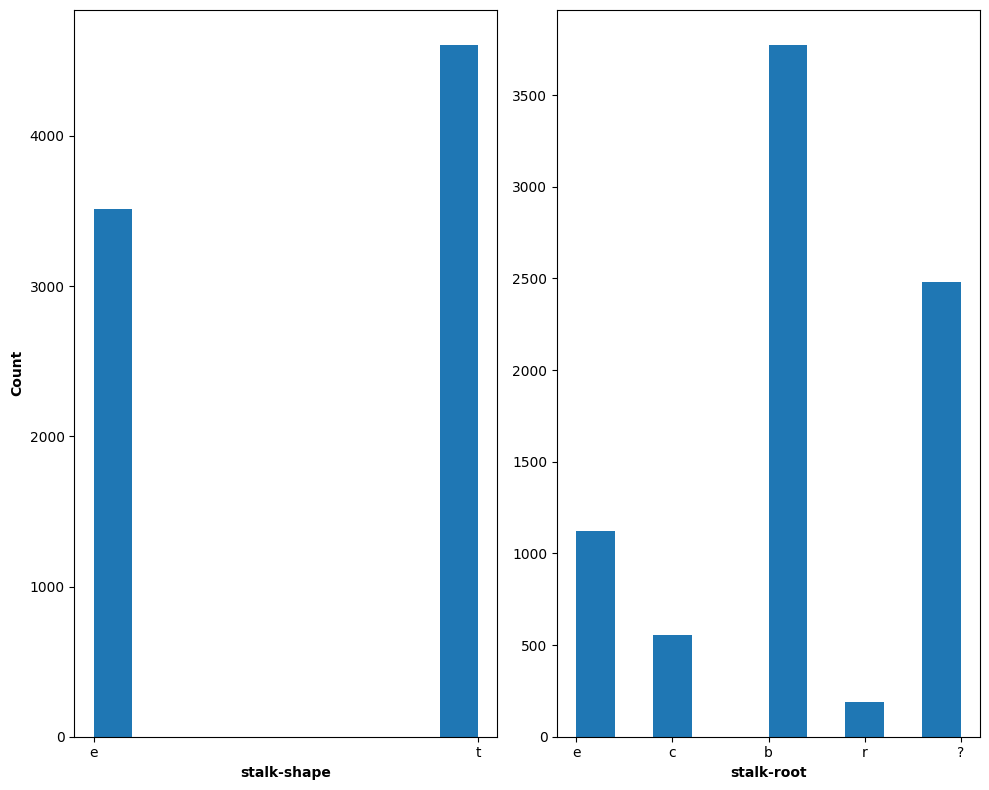

In [15]:
#making data distribution graph for 'stalk-shape','stalk-root' columns
fig, ax=plt.subplots(1,2, figsize=(10,8))
body=['stalk-shape','stalk-root']
for i in range(len(body)):
    ax[i].hist(df[body[i]])
    ax[i].set_xlabel(body[i], fontweight='bold')
    if i==0:
         ax[i].set_ylabel('Count', fontweight='bold')
    plt.tight_layout()


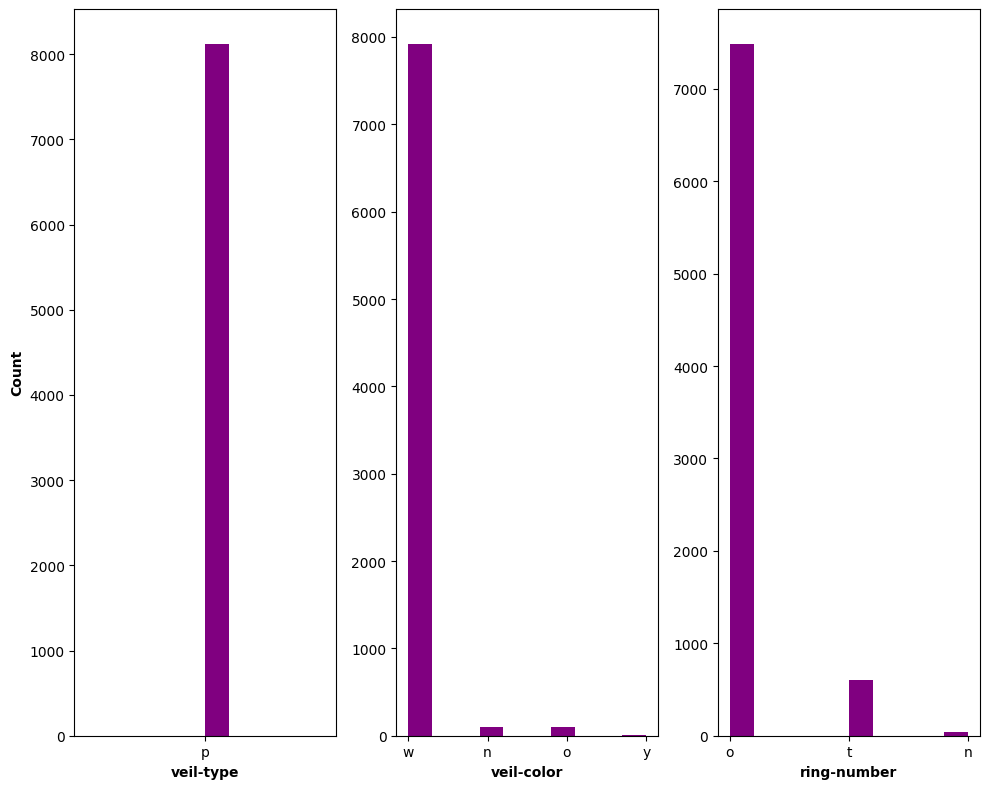

In [16]:
#making data distribution graph for 'veil-type','veil-color','ring-number columns
fig, ax=plt.subplots(1,3, figsize=(10,8))
body=['veil-type','veil-color','ring-number']
for i in range(len(body)):
    ax[i].hist(df[body[i]], color='purple')
    ax[i].set_xlabel(body[i], fontweight='bold')
    if i==0:
         ax[i].set_ylabel('Count', fontweight='bold')
    plt.tight_layout()


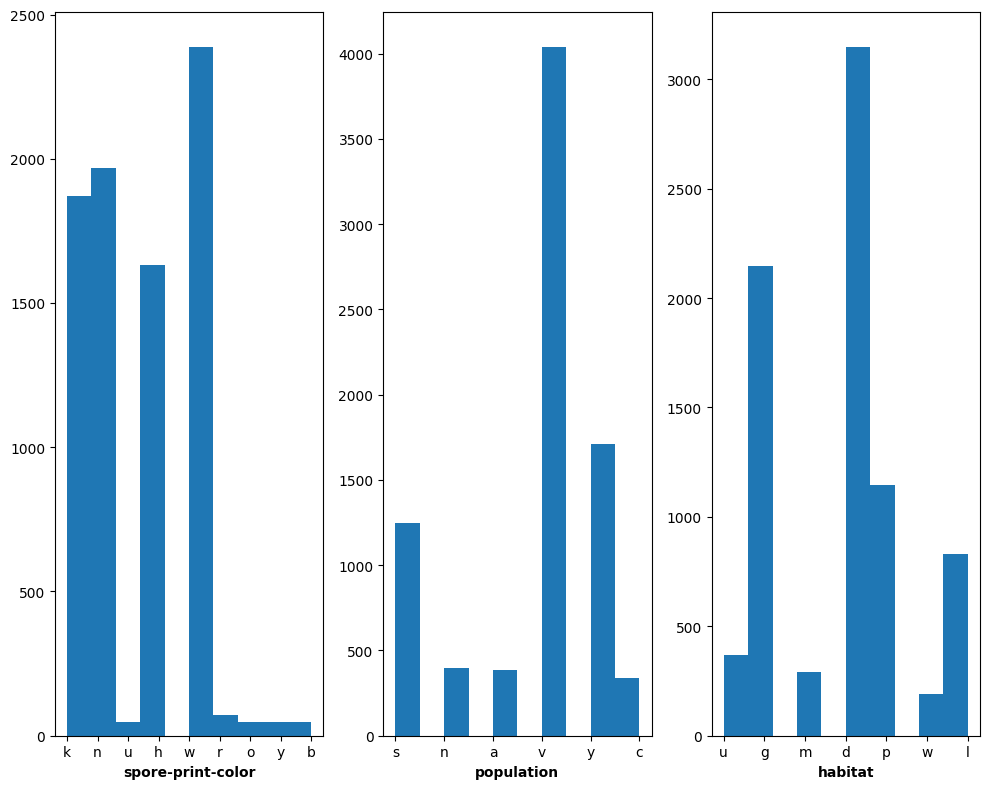

In [17]:
#making data distribution graph for 'spore-print-color','population','habitat' columns
fig, ax=plt.subplots(1,3, figsize=(10,8))
body=['spore-print-color','population','habitat']
for i in range(len(body)):
    ax[i].hist(df[body[i]])
    ax[i].set_xlabel(body[i], fontweight='bold')
    plt.tight_layout()


In [18]:
#looking for missing/unknown value in stalk-root column
df['stalk-root'].value_counts()/len(df)*100

stalk-root
b    46.479567
?    30.526834
e    13.786312
c     6.843919
r     2.363368
Name: count, dtype: float64

In [19]:
#making list of all columns of the data set
tot_columns=df.columns.to_list()
feature_col= tot_columns[1:]

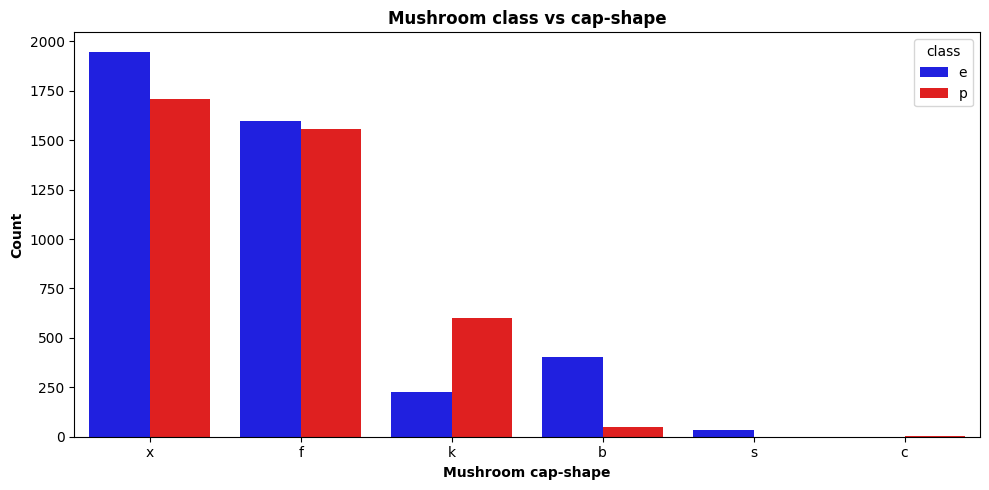

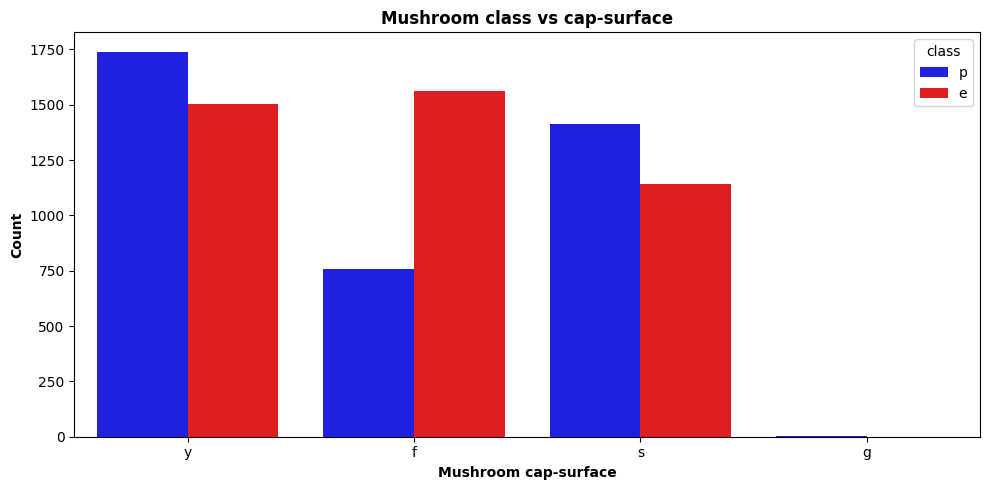

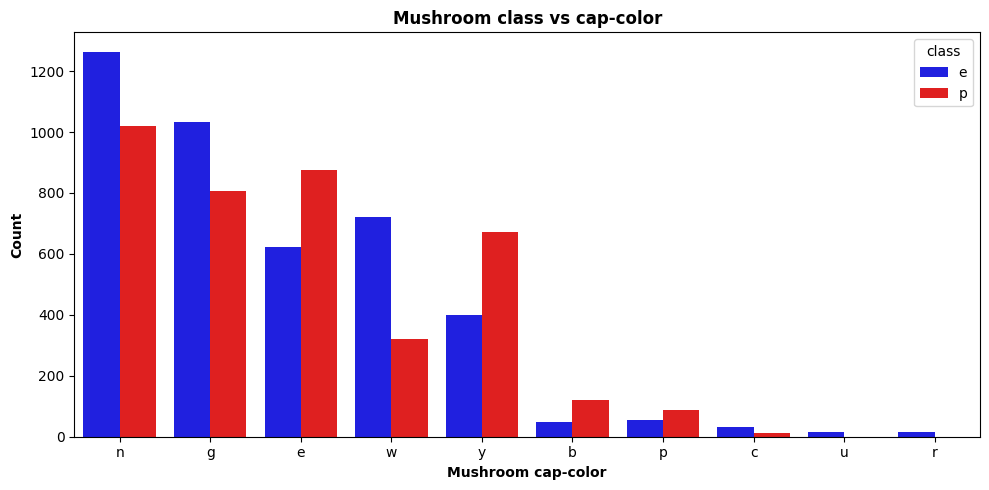

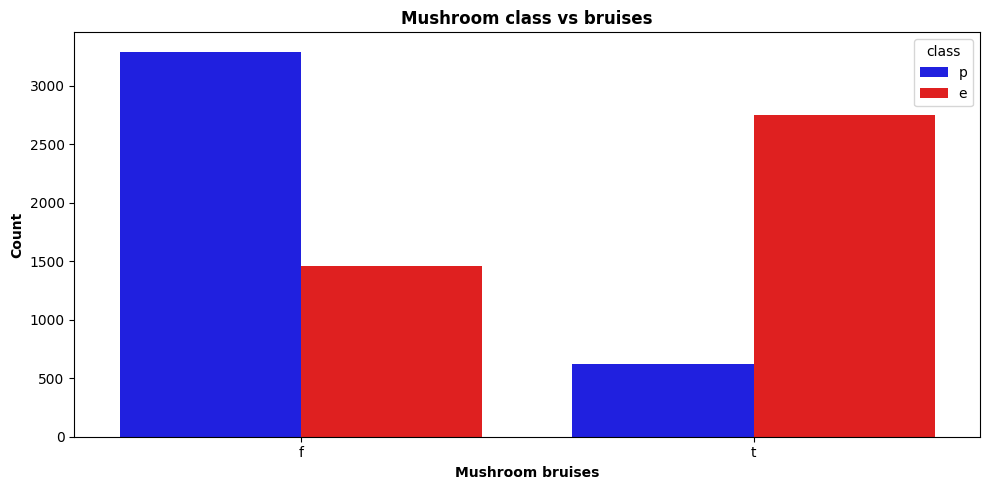

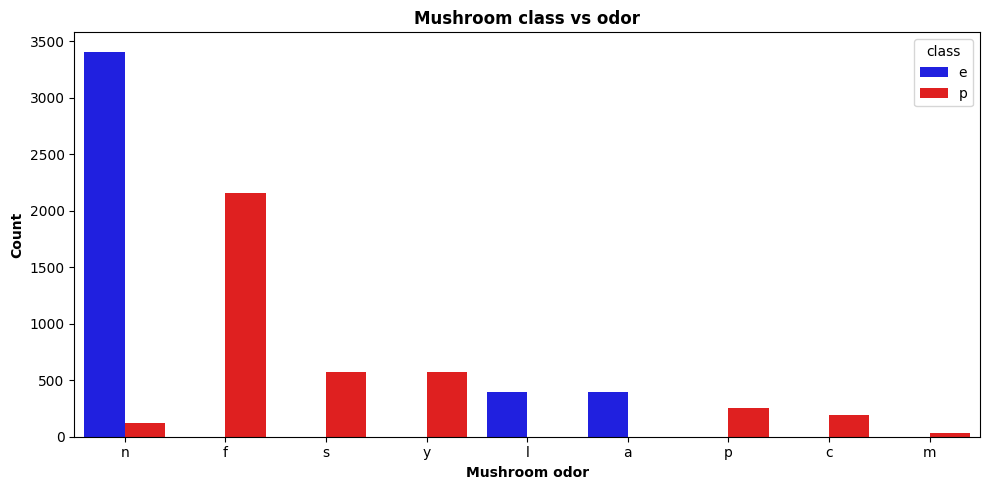

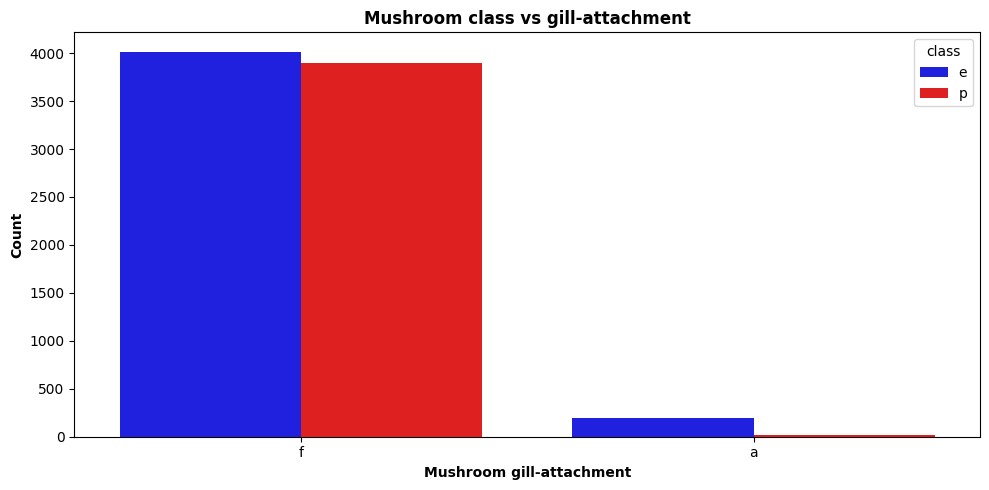

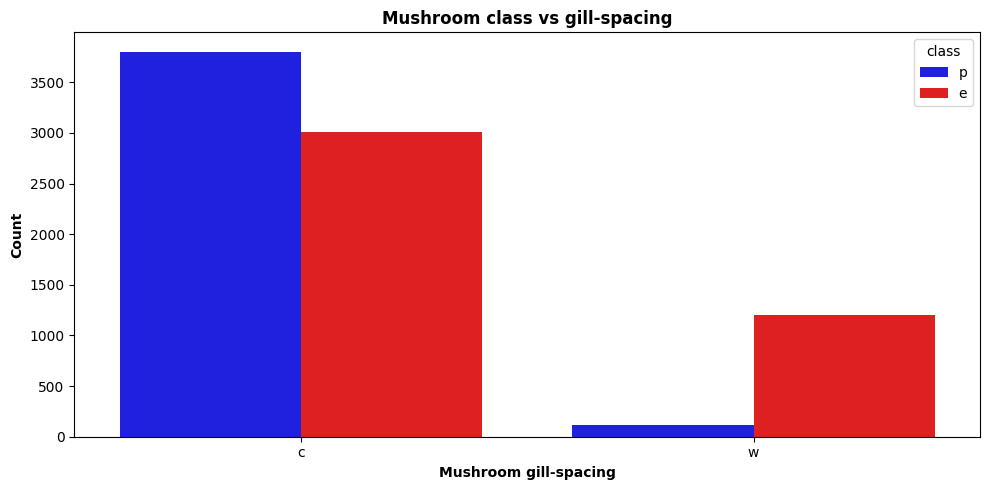

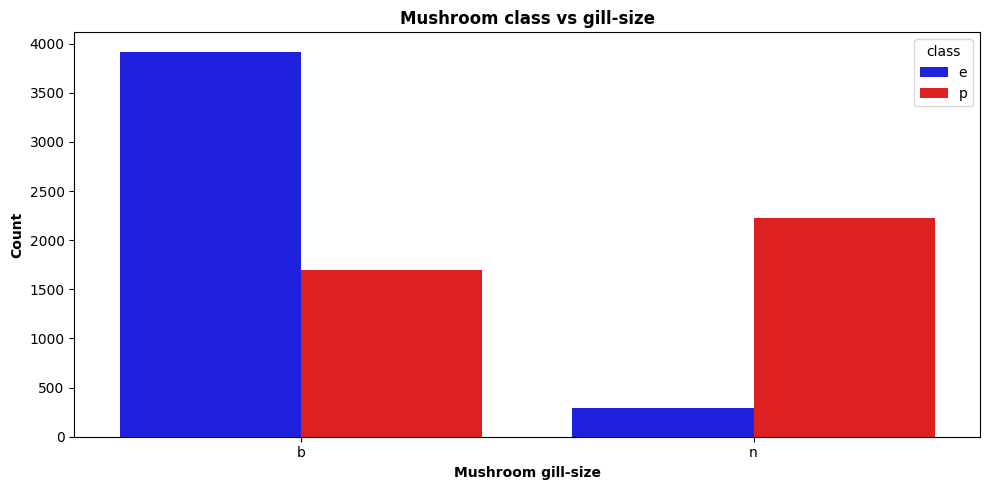

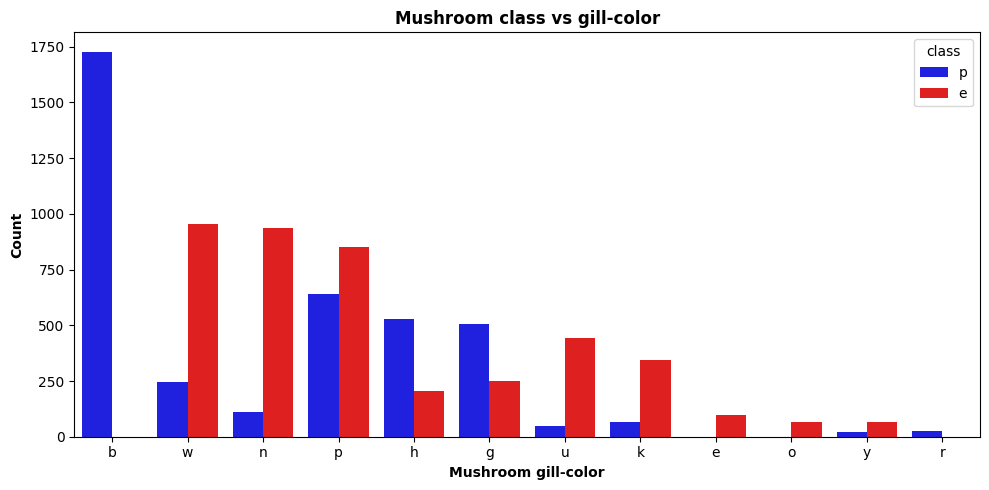

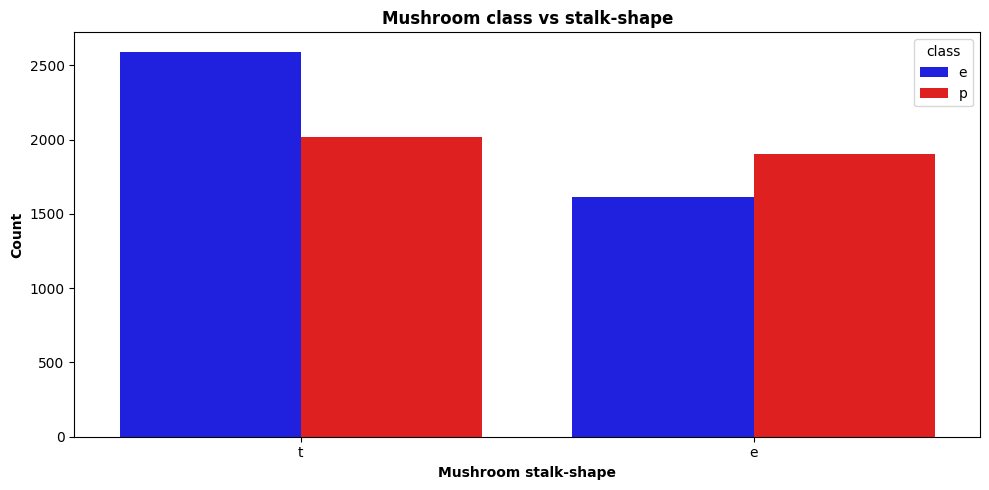

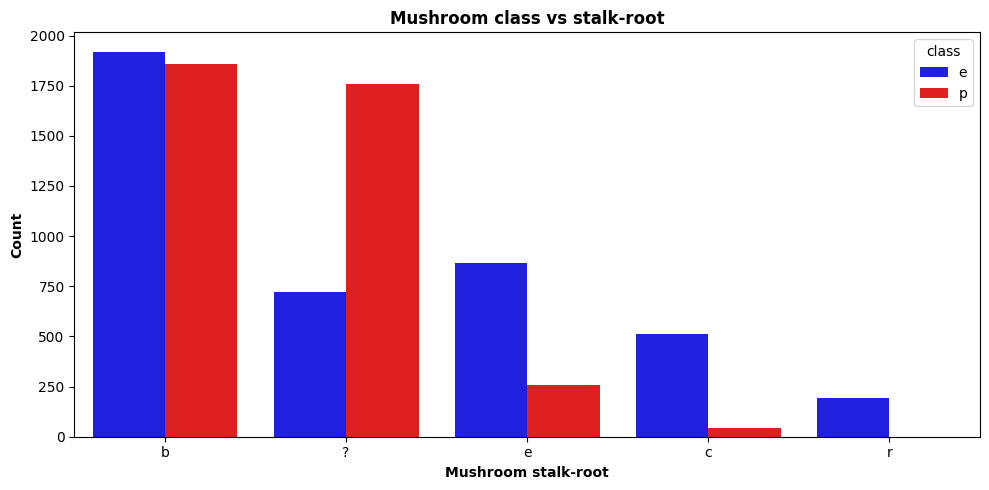

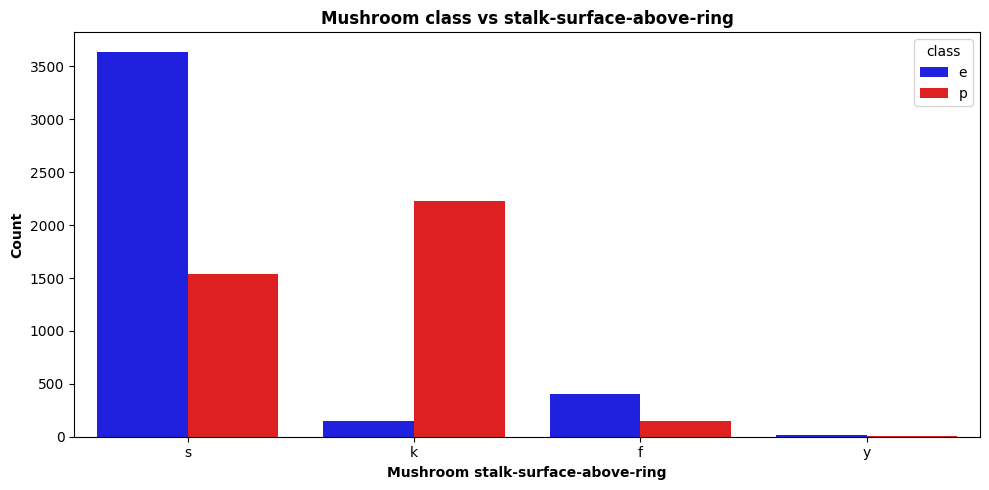

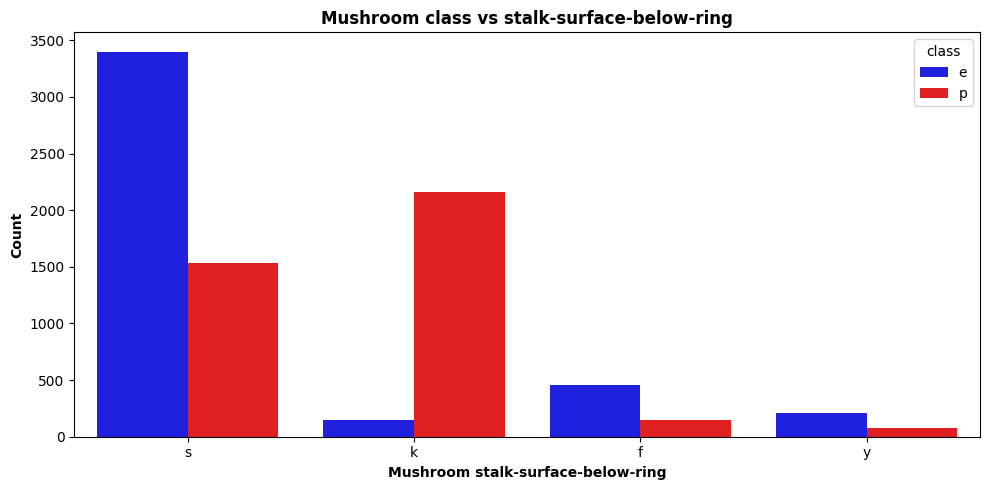

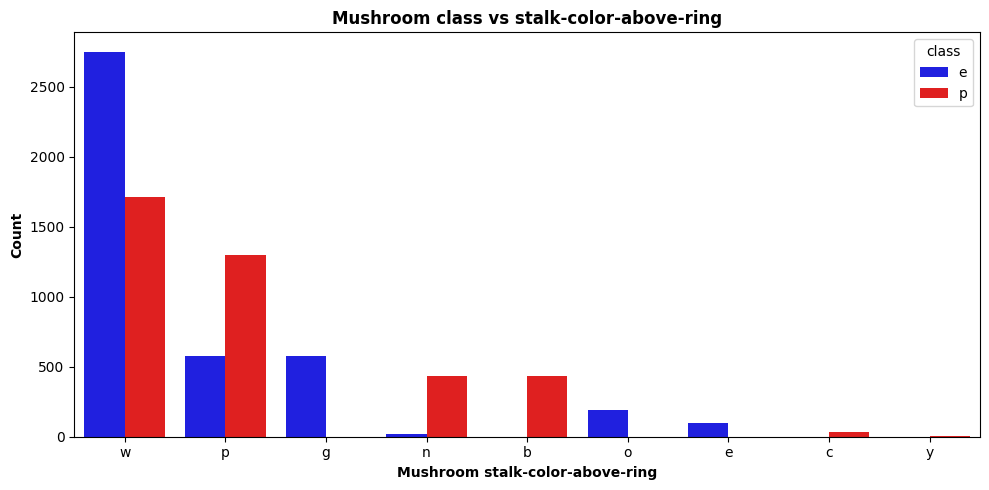

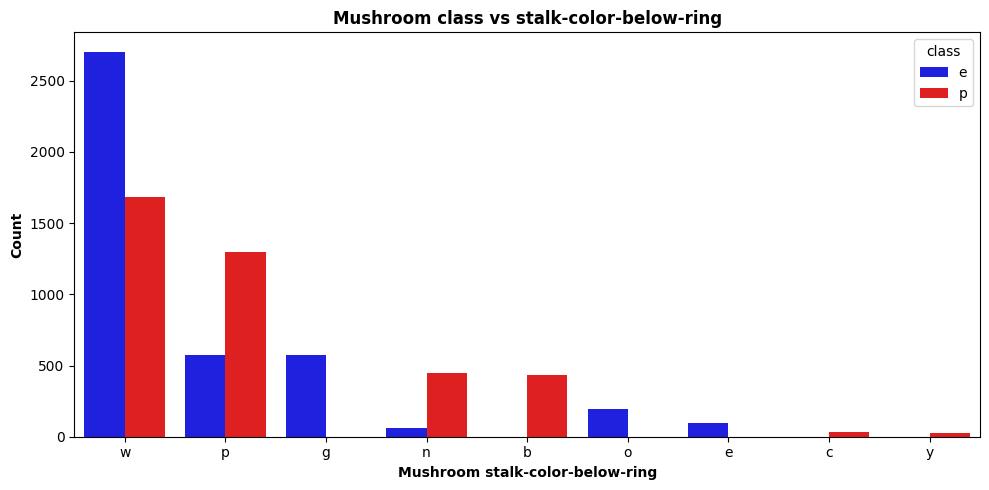

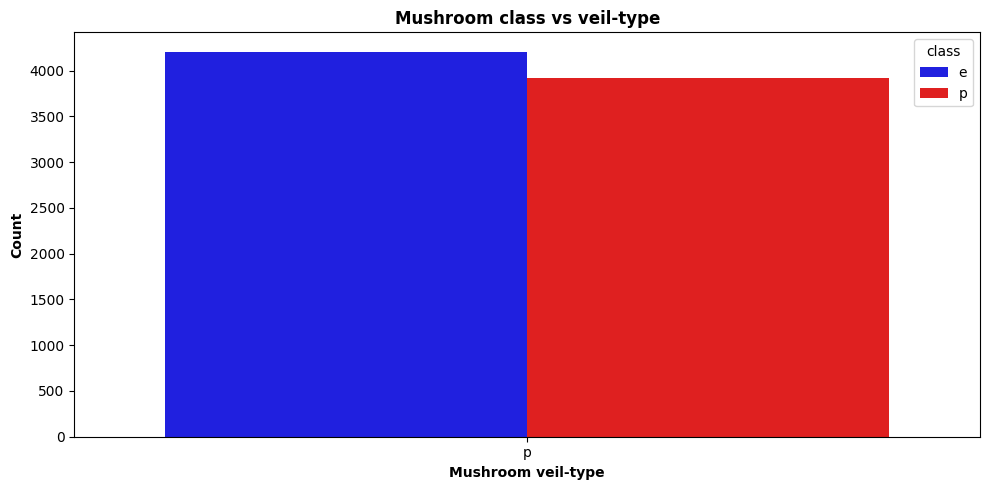

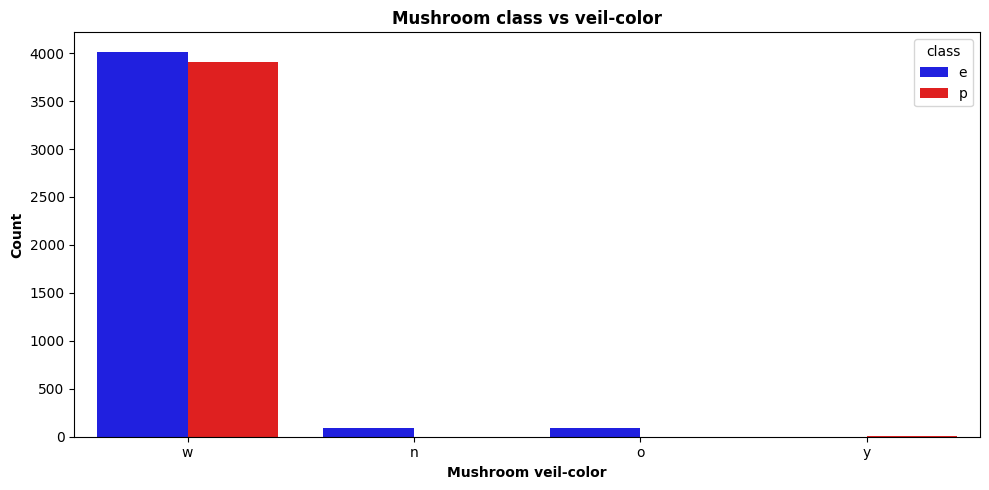

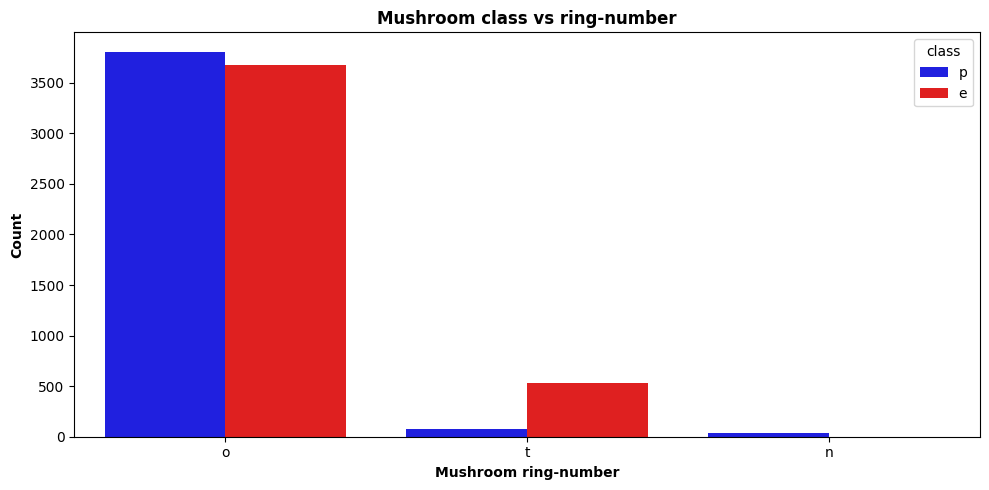

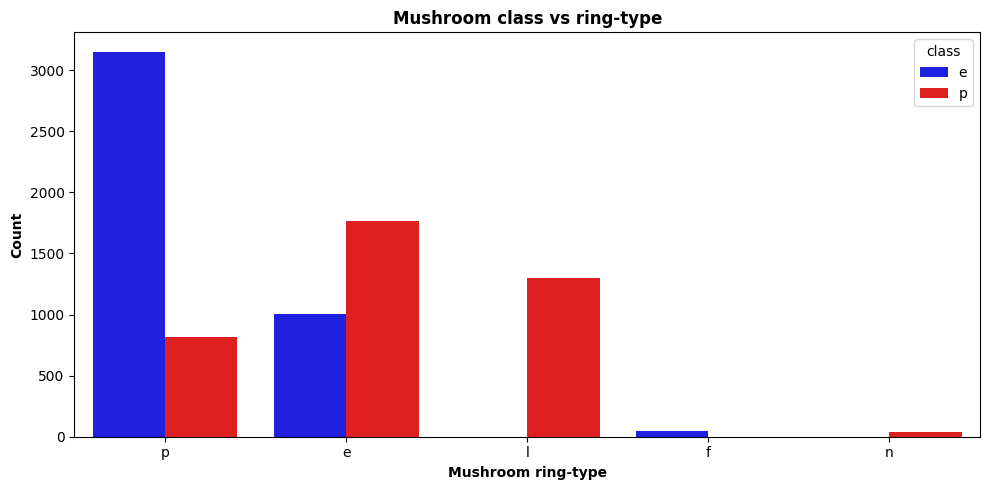

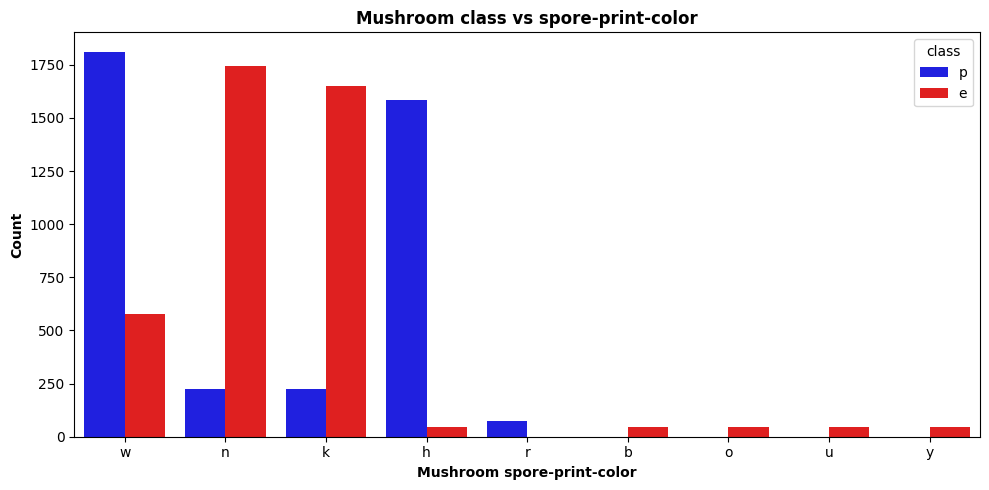

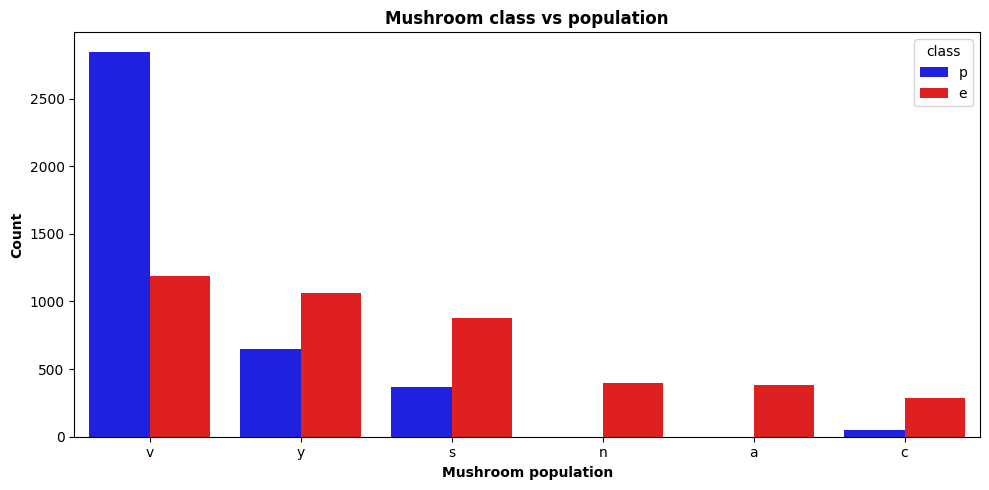

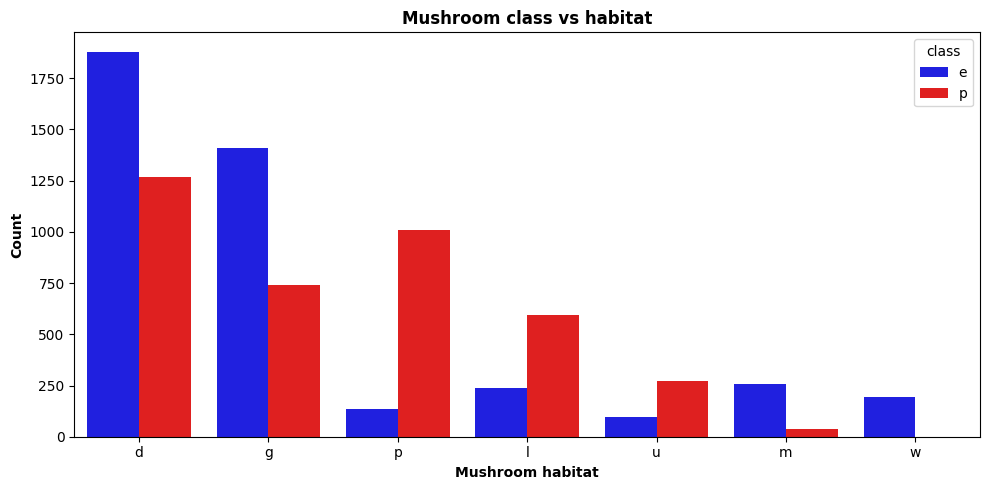

In [20]:
#making graph to see how target is related to features. I have used for loop to plot all the 22 graph at once 
data_frames=[]

for i in range(len(feature_col)):
    data_all=df[[feature_col[i], 'class']].value_counts().reset_index()
    data_frames.append(data_all)

    plt.figure(figsize=(10,5))

    sns.barplot(data=data_all, x=feature_col[i], y='count', hue='class', palette=["blue","red"])
    plt.title(f'Mushroom class vs {feature_col[i]}', fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.xlabel(f'Mushroom {feature_col[i]}', fontweight='bold')
    plt.tight_layout()
    plt.show()



In [21]:
#looking the count of different categories in target column
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [22]:
#changing larget column 'class' into numeric collum
encod=LabelEncoder()
df['class']=encod.fit_transform(df['class'])


In [23]:
#checking level encoded column that e=0 and p=1
df['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

In [24]:
#checking how many categories each column has
df[df.columns.to_list()].nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [25]:
#displaying all the columns
pd.set_option('display.max_columns', None)

In [26]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [27]:
#cheching the count of different categories in stalk-root column
df['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [28]:
#changing '?' with 'b' which is the mode
df['stalk-root']= df['stalk-root'].replace('?', 'b')

In [29]:
#assigning columns used for features
x_column=df.columns.tolist()[1:]



In [30]:
# using one hot encoder for features to change them into numeric column
hot_enco=OneHotEncoder(sparse_output=False)
hot_enco_colum=hot_enco.fit_transform(df[x_column])

encoded_df = pd.DataFrame(hot_enco_colum, columns=hot_enco.get_feature_names_out()) #this will make new column names containg the previous column name and categoies                                                                                  

df= pd.concat([df, encoded_df], axis=1)
encoded_df.shape



(8124, 116)

In [31]:
#assigning x and y
x=encoded_df
y=df['class']
x

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [32]:
#splitting the data into training and testing set
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=.2, random_state=32)

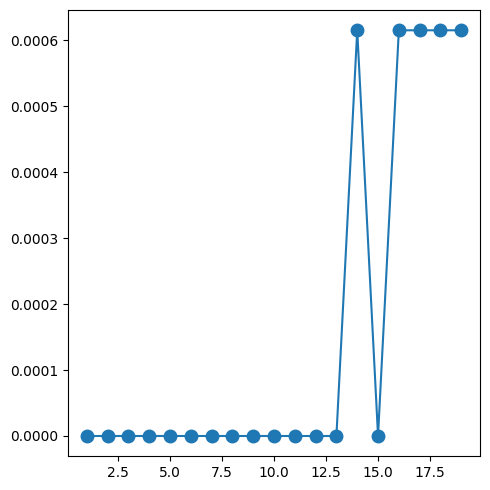

In [33]:
#finding the number of neighbours for knn
error_rate=[]

for i in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))
plt.figure(figsize=(5,5))
plt.plot(range(1,20), error_rate, marker ='o', markersize=9)
plt.tight_layout()

In [34]:
# writing a for loop to buid different models and print accuracy score and classification report 

classification_models=[LogisticRegression(), GaussianNB(), KNeighborsClassifier(n_neighbors=5),
                        DecisionTreeClassifier(criterion='gini', random_state=32),
                        DecisionTreeClassifier(criterion='entropy', random_state=32),
                        svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),svm.SVC(kernel='sigmoid')]
model_name =['log_reg','naive_b','knn', 'DT_gini', 'DT_entropy', 'svm_linear', 'svm_rbf','svm_sigmoid']

all_accuracy_score=[] #this list I will use to plot accuracy score vs different model

for i in range(len(classification_models)):

    model=classification_models[i].fit(x_train,y_train)
    model_pred= model.predict(x_test)

    accuracy=accuracy_score(y_test,model_pred)
    
    all_accuracy_score.append(accuracy)
    class_report= classification_report(y_test,model_pred)

    print(f'Accuracy score for {model_name[i]}: {round(accuracy,3)}')
    print(f'classification report for {model_name[i]}:\n {class_report}')
    

Accuracy score for log_reg: 1.0
classification report for log_reg:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy score for naive_b: 0.945
classification report for naive_b:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       846
           1       0.90      1.00      0.95       779

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Accuracy score for knn: 1.0
classification report for knn:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      

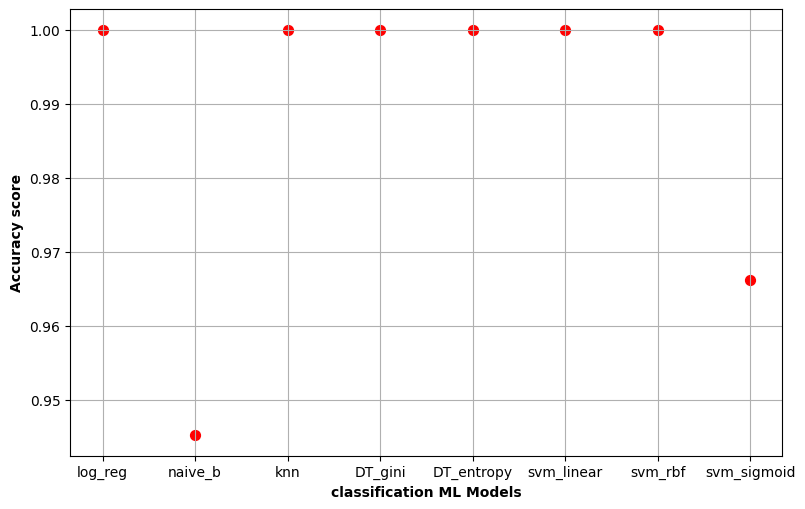

In [35]:
#plotting accuracy score vs different ML models
plt.subplots(figsize=(8,5))
plt.scatter(model_name, all_accuracy_score, c = 'r', s=50)
plt.grid(True)
plt.tight_layout()
plt.xlabel('classification ML Models', fontweight='bold')
plt.ylabel('Accuracy score', fontweight='bold');

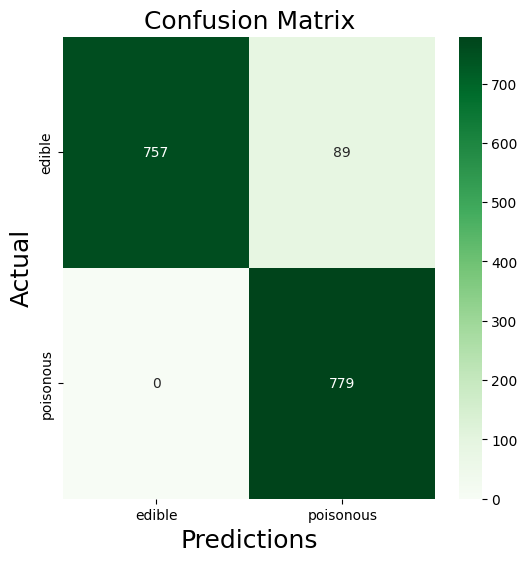

In [36]:
#making confusion matrix of naibe base models

nb_pred=classification_models[1].predict(x_test)
conf_mat = confusion_matrix(y_test, nb_pred)
labels = ['edible', 'poisonous']
# Plot confusion matrix with custom labels

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [37]:
# k fold cross validation
model = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=32)
scores = cross_val_score(model, x, y, cv=kf)
print("K-Fold Cross Validation scores:", scores)
print("Mean accuracy:", np.mean(scores))


K-Fold Cross Validation scores: [1.         0.99938462 1.         1.         1.        ]
Mean accuracy: 0.9998769230769231
